## Descrição do Notebook

1. Seleção de Atributos

2. Transformação de Dados

3. Correção de Desbalanceamento

### 1. Seleção de Atributos

In [1]:
import importlib
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_bank = pd.read_csv("bank-additional-full.csv", delimiter=';')

# 5 primeiras linhas
data_bank.head()                    

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Combinações de features
data_bank['catc_camp_previ'] = data_bank['campaign'].apply(lambda x: '[4, ...)' if x >=4 else str(x)) + ' + ' +\
  data_bank['previous'].apply(lambda x: 'Com Contato Previo' if x >= 1 else 'Sem Contato Previo')

bins= [-11, 5, 15]
labels = ['Ruim', 'Ok']
data_bank['cat_conf'] = data_bank['cons.conf.idx'] - data_bank['cons.conf.idx'].mean()
data_bank['cat_conf'] = pd.cut(data_bank['cat_conf'], bins=bins, labels=labels, right=False).astype(str)
data_bank['catc_pout_conf'] = data_bank['poutcome'] + ' + ' + data_bank['cat_conf']

#### Descrição dos Métodos Utilizados

1. Feature Importance
    - Uso de Random Florest para ajuste nos dados e verificação da importância das variáveis

2. Information Gain
    - O ganho de informação é simplesmente a redução esperada na entropia causada pela partição dos exemplos de acordo com este atributo

3. Backward Feature Elimination
    - Este Seletor de recurso sequencial remove (seleção para trás) recursos para formar um subconjunto de recursos de maneira gananciosa. Em cada estágio, este estimador escolhe o melhor recurso para remover com base na pontuação de validação cruzada de um estimador.

4. Lasso Regularization (L1)
    - A regressão do laço (mínimo absoluto de redução e operador de seleção) adiciona “ valor absoluto de magnitude ” do coeficiente como termo de penalidade para a função de perda.

5. Boruta 
    -  Boruta é baseado em duas ideias, características de sombra e distribuição binomial. Ao usar o Boruta, as características não são avaliadas com elas mesmas, mas com uma versão aleatória delas, primeiro duplica-se o conjunto de dados criando variáveis sombras e mistura-se aleatoriamente os valores de cada coluna, verificando para cada variável real se a mesma tem um importancia maior que a variável sombra, e se tiver chamamos isso de acerto e continuamos as demais iterações. Este passo é chamado de características de sombra e tem a função de remover suas correlações com a variável resposta.

        - Para a ideia de distribuição binomial, Boruta pega um recurso que não sabemos ser útil ou não e recusa ou aceita o recurso com base em três áreas: 


        1. Área de recusa: área onde as variáveis são descartados por serem considerados ruído.

        2. Área de indecisão: área onde Boruta é indeciso sobre a relevância da variável.

        3. Área de aceitação: área onde as variáveis são considerados preditivas.

6. Random Column

    - Cria uma coluna com valores aleatórios e compara a com a feature importance das outras colunas.

In [8]:
import feature_selection as fs
importlib.reload(fs)

no_var_list = ['duration', 'cat_conf']
X = data_bank.drop(no_var_list + ['y'], axis=1)
var_cat = X.select_dtypes(exclude=[np.number]).columns.to_list()

for var in var_cat:
    df = pd.DataFrame(X[var].factorize()[0], columns= [var])
    X = X.drop(var,axis=1)
    X = pd.concat([X, df], axis=1)

y = data_bank['y'].copy()
y = y.factorize()[0]

V = fs.Voting(X, y)
result_vot = V.voter()
result_vot

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   23.0s finished
Features: 1/9[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.9s finished
Features: 2/9[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   26.8s finished
Features: 3/9[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   31.9s finished
Features: 4/9[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   33.8s finished
Features: 5/9[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   32.3s finished
Features: 6/9[Parallel(n_jobs=-1)]: Using backend Lok

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	3
I

,feature,var_imp,mutual_info,bfs,lasso,boruta,rand_var
0,nr.employed,0.272007,0.063334,to_remove,to_remove,to_keep,to_keep
1,euribor3m,0.163550,0.073997,to_keep,to_keep,to_keep,to_keep
2,pdays,0.136267,0.035938,to_keep,to_remove,to_keep,to_keep
3,catc_pout_conf,0.115629,0.044360,to_remove,to_keep,to_keep,to_keep
4,poutcome,0.081860,0.031637,to_keep,to_keep,to_keep,to_keep
5,emp.var.rate,0.070215,0.055319,to_remove,to_keep,to_keep,to_keep
6,cons.conf.idx,0.062081,0.067506,to_remove,to_remove,to_keep,to_keep
7,cons.price.idx,0.040289,0.068769,to_remove,to_keep,to_keep,to_keep
8,previous,0.015556,0.020695,to_keep,to_keep,to_keep,to_keep
9,month,0.012738,0.026658,to_remove,to_keep,to_keep,to_keep


In [152]:
data_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


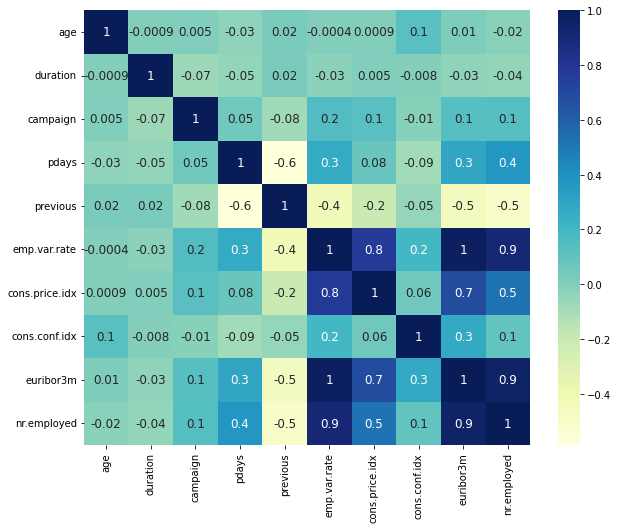

In [181]:
corr_matrix = data_bank.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt ='.1g', cmap="YlGnBu",annot_kws={"size":12});

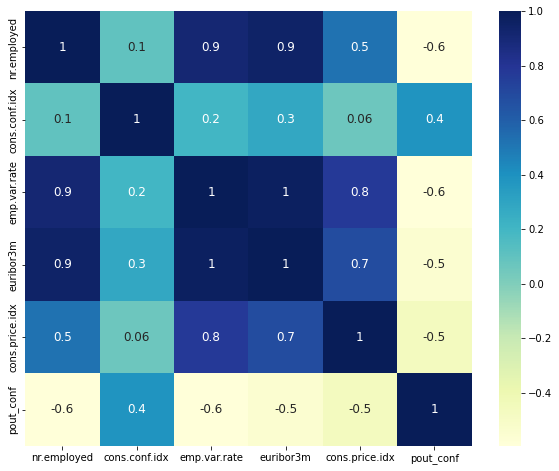

In [182]:
# matriz de correlação
X = data_bank.drop(['y'], axis=1)
bins= [-11, 5, 15]
labels = ['Ruim', 'Ok']
X['catc_pout_conf'] = X['cons.conf.idx'] - X['cons.conf.idx'].mean()
X['catc_pout_conf'] = pd.cut(X['catc_pout_conf'], bins=bins, labels=labels, right=False).astype(str)
X['pout_conf'] = X['poutcome'] + ' + ' + X['catc_pout_conf']
X['pout_conf'] = X['pout_conf'].factorize()[0]
corr_matrix = X[[
'nr.employed',
'cons.conf.idx',
 'emp.var.rate',
 'euribor3m',
 'cons.price.idx',
 'pout_conf'
 ]].corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt ='.1g', cmap="YlGnBu",annot_kws={"size":12});

### Features não Utilizadas
> 1. **Pouca discriminação**

- day_of_week

> 2. **Proporção de 'unknown'**

- default

> 3. **Votação**

- loan

- housing

- marital

> 4. **Correlação + Votação**

- nr.employed
- cons.conf.idx
- emp.var.rate

### 3. Tratamento de Features

#### 3.1 Pipeline

In [4]:
import numpy as np 
import pandas as pd 
from sklearn.base import BaseEstimator, TransformerMixin

# classe para categorizar numéricas:
class Categorize(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # age:
        bins= [-1, 28, 33, 38, 49, 55, np.inf]
        labels = ['(..., 28]', '(28, 33]', '(33, 38]', '(38, 49]', '(49, 55]', '(55, ...)']
        X['age'] = pd.cut(X['age'], bins=bins, labels=labels, right=True)
        
        # campaign
        X['campaign'] = X['campaign'].apply(lambda x: '[4, ...)' if x >=4 else str(x))
        
        # pdays
        X['pdays'] = X['pdays'].apply(lambda x: 'Primeiro Contato' if x == 999 else 'Ja Contatado')
        
        return X

# classe para agrupar categóricas
class Group(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        
        def is_in(x, list_classes):
            for var in list_classes:
                if var == x:
                    return True
            return False

        def group_classes_job(x):
            others = ['unemployed','unknown']
            services = ['services', 'housemaid']
            if is_in(x, others):
                return 'others'
            if is_in(x, services):
                return 'services'
            return x
        
        # job
        X['job'] = X['job'].apply(group_classes_job).astype('str')
        
        def group_classes_education(x):
            basics = ['basic.4y','basic.6y','basic.9y','unknown','illiterate']
            high = ['high.school', 'professional.course']
            if is_in(x, basics):
                return 'basics'
            if is_in(x, high):
                return 'high'
            return 'university_degree'
        
        # education
        X['education'] = X['education'].apply(group_classes_education).astype('str')
        return X
    
# classe para combinar features:
class CombineFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # contatos totais já realizados        
        X['catc_camp_previ'] = X['campaign'] + ' + ' + X['previous'].apply(lambda x: 'Com Contato Previo' if x >= 1 else 'Sem Contato Previo')
        
        # resultado da campanha anterior e índice de confiança
        bins= [-11, 5, 15]
        labels = ['Ruim', 'Ok']
        X['catc_pout_conf'] = X['cons.conf.idx'] - X['cons.conf.idx'].mean()
        X['catc_pout_conf'] = pd.cut(X['catc_pout_conf'], bins=bins, labels=labels, right=False).astype(str)
        X['catc_pout_conf'] = X['poutcome'] + ' + ' + X['catc_pout_conf']
        return X
    
# classe para excluir features:
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.drop_list = list(set(['day_of_week', 'default', 'loan', 'housing', 
                                    'marital', 'nr.employed', 'emp.var.rate', 'cons.conf.idx', 'duration']))
        self.columns = []
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.drop(self.drop_list, axis=1)  
        self.columns = list(X.columns) 
        return X
            
    def get_feature_names(self):
        return self.columns

# classes para separar variáveis categóricas e numéricas
class CatSelect(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vars = []
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        self.vars = X.select_dtypes(exclude=[np.number]).columns.to_list()
        return X[self.vars].values
    def get_cat(self):
        return self.vars
        
class NumSelect(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vars = [] 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        self.vars = X.select_dtypes(include=[np.number]).columns.to_list()
        return X[self.vars].values
    def get_num(self):
        return self.vars

In [5]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
feature_eng = Pipeline([
        ('categorizar', Categorize()),
        ('agrupar', Group()),
        ('combinar', CombineFeatures()),
        ('drop', DropFeatures())
    ])

In [6]:
cat_pipeline = Pipeline([
        ('selector', CatSelect()),
        ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

num_pipeline = Pipeline([
        ('selector', NumSelect()),
        ('std_scaler', StandardScaler()),
    ])

prepare_features =FeatureUnion(transformer_list=[
        ("cat_pipeline", cat_pipeline),
        ("num_pipeline", num_pipeline)
    ])

In [7]:
preprocessing =  Pipeline([
        ('feature_eng', feature_eng),
        ('prepare_features', prepare_features)])
data = preprocessing.fit_transform(data_bank.drop(['y'],axis=1));

y =pd.DataFrame(data = data_bank['y'].factorize()[0].copy(), columns=['y'])

In [8]:
cat_features = preprocessing.steps[1][1].transformer_list[0][1].named_steps['selector'].get_cat()
cat_features = list(preprocessing.steps[1][1].transformer_list[0][1].named_steps['cat_encoder'].get_feature_names_out(cat_features))
num_features = preprocessing.steps[1][1].transformer_list[1][1].named_steps['selector'].get_num()

feature_names = cat_features + num_features

In [9]:
X = pd.DataFrame(columns = feature_names, data=data)
X[cat_features] = X[cat_features].astype(int)
X.head()

,"age_(..., 28]","age_(28, 33]","age_(33, 38]","age_(38, 49]","age_(49, 55]","age_(55, ...)",job_admin.,job_blue-collar,job_entrepreneur,job_management,...,cat_conf_Ruim,catc_pout_conf_failure + Ok,catc_pout_conf_failure + Ruim,catc_pout_conf_nonexistent + Ok,catc_pout_conf_nonexistent + Ruim,catc_pout_conf_success + Ok,catc_pout_conf_success + Ruim,previous,cons.price.idx,euribor3m
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,-0.349494,0.722722,0.71246
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,-0.349494,0.722722,0.71246
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,-0.349494,0.722722,0.71246
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,-0.349494,0.722722,0.71246
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,-0.349494,0.722722,0.71246


In [15]:
pd.concat([X,y], axis=1).to_csv('processed_data.csv', index=False)

### 3. Tratamento de Desbalanceamento

In [146]:
from sklearn.model_selection import train_test_split

data = pd.concat([X, y],axis=1)
data_train, data_test = train_test_split(data,test_size=0.2,random_state=42)

data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

X_train = data_train.drop('y',axis=1).copy()
y_train = data_train[['y']].copy()

X_test = data_test.drop('y',axis=1).copy()
y_test = data_test[['y']].copy()


In [147]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 3/7, random_state=42)

X_res, y_res = ros.fit_resample(X_train, y_train)